# **Retrieving data from spatial database infrastructures**

## goals of the tutorial
- geocoding / reverse geocoding
- OGC services
- ESRI ArcGIS RestAPI

**based on the open data of:**
- [national repertoire of territorial data](https://geodati.gov.it/geoportale/)
- [national cartographic portal](http://www.pcn.minambiente.it/mattm/)
- [geoportal of Trentino](http://www.territorio.provincia.tn.it/portal/server.pt/community/portale_geocartografico_trentino/254)
- [italian civil protection department](http://www.protezionecivile.gov.it/)

### requirements
- python knowledge
- geopandas
- gis concepts


**status**

*looking for data*

---

# Geocoding / reverse geocoding

## Setup

In [93]:
pip install geopandas

In [94]:
# only for visualization purpouse
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-bi_z7usy
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-bi_z7usy
  Created wheel for folium: filename=folium-0.11.0+20.gb70efc6-py2.py3-none-any.whl size=97529 sha256=e2eaa5056580dc3c40a33859f4ec77bc2734a05fcf5d69af876e3d3618af710f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wk6zj1bq/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [95]:
import geopandas as gpd

**GEOCODING service**

![](https://avatars2.githubusercontent.com/u/1385808?s=400&v=4")

- the geopandas module is based on [geopy](https://geopy.readthedocs.io/en/stable/)
- all the goecoders service are available [here](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders)


**NOTE**

Attention to the Rate Limit in Pandas<br/>
more info [here](https://geopy.readthedocs.io/en/stable/#usage-with-pandas)

**choose the right service**
<br/><br/>

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/getlonlat.png)

<br/><br/>
visit [getlon.lat](https://getlon.lat/)

## geocoding

In [96]:
cols = ['city']
names = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
cities = gpd.GeoDataFrame(names,columns=cols)

In [97]:
cities

,city
0,Roma
1,Palermo
2,Trento
3,Genova
4,Bari
5,Trieste
6,Napoli
7,Cagliari
8,Messina
9,Lecce


In [98]:
geo_cities = gpd.tools.geocode(cities.city, provider="arcgis")

In [99]:
geo_cities

,geometry,address
0,POINT (12.49565 41.90322),Roma
1,POINT (13.36112 38.12207),Palermo
2,POINT (11.11926 46.07005),Trento
3,POINT (8.93898 44.41039),Genova
4,POINT (16.86666 41.12587),Bari
5,POINT (13.77269 45.65757),Trieste
6,POINT (14.25226 40.84014),Napoli
7,POINT (9.11049 39.21454),Cagliari
8,POINT (15.55308 38.17837),Messina
9,POINT (18.16802 40.35796),Lecce


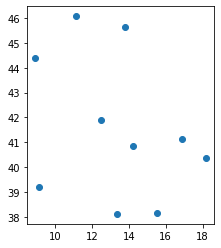

In [100]:
geo_cities.plot()

## reverse geocoding

In [101]:
from geopy.geocoders import Nominatim

In [102]:
geo_cities

,geometry,address
0,POINT (12.49565 41.90322),Roma
1,POINT (13.36112 38.12207),Palermo
2,POINT (11.11926 46.07005),Trento
3,POINT (8.93898 44.41039),Genova
4,POINT (16.86666 41.12587),Bari
5,POINT (13.77269 45.65757),Trieste
6,POINT (14.25226 40.84014),Napoli
7,POINT (9.11049 39.21454),Cagliari
8,POINT (15.55308 38.17837),Messina
9,POINT (18.16802 40.35796),Lecce


In [103]:
point = geo_cities.geometry[2]

In [104]:
point.wkt

'POINT (11.11926000000005 46.07005000000004)'

In [105]:
type(point.x)

float

In [106]:
latlon = str(point.y) + "," + str(point.x)

In [107]:
geolocator = Nominatim(user_agent="Example for the course")

.. but better if use a user agent like

*Mozilla/5.0 (Linux; Android 10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36*

Eg

*geolocator = Nominatim(user_agent="Mozilla/5.0 (Linux; Android10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36")*



In [108]:
location = geolocator.reverse(latlon)

the raw method contains all the data available from the geocoder

In [109]:
location.raw

{'address': {'city': 'Trento',
  'country': 'Italia',
  'country_code': 'it',
  'county': 'Provincia di Trento',
  'house_number': '15',
  'municipality': "Territorio Val d'Adige",
  'postcode': '38122',
  'road': 'Via Torre Vanga',
  'state': 'Trentino-Alto Adige/Südtirol',
  'suburb': 'Centro storico Trento',
  'tourism': 'Giovane Europa'},
 'boundingbox': ['46.0700951', '46.0703188', '11.119026', '11.1194422'],
 'display_name': "Giovane Europa, 15, Via Torre Vanga, Centro storico Trento, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia",
 'lat': '46.070178',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '11.119240793834841',
 'osm_id': 73293763,
 'osm_type': 'way',
 'place_id': 104813655}

## suggestion for a good geocoding
more details you add and more fortune you have to obtain a good result

In [110]:
q="Via Verdi, 26"

In [111]:
point = gpd.tools.geocode(q, provider="arcgis")

In [112]:
# import of folium to show the map
import folium

In [113]:
map_point = folium.Map([point.geometry.y,point.geometry.x], zoom_start=18)
folium.GeoJson(point.to_json()).add_to(map_point)
map_point

add details like city and State

In [114]:
q="Via Verdi, 26, Trento, Italia"

In [115]:
point = gpd.tools.geocode(q, provider="arcgis")

In [116]:
point

,geometry,address
0,POINT (11.11966 46.06665),"Via Giuseppe Verdi 26, 38122, Trento"


In [117]:
map_point = folium.Map([point.geometry.y,point.geometry.x], zoom_start=18)
folium.GeoJson(point.to_json()).add_to(map_point)
map_point

Try a different geocoder

In [118]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim",user_agent="Example for the course")

In [119]:
point_nominatim

,geometry,address
0,POINT (10.76813 46.31650),"Via Verdi, Ognano, Stavel, Pellizzano, Comunit..."


In [120]:
q="Via Giuseppe Verdi, 26, Trento, Italia"

In [121]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim",user_agent="Example for the course")

In [122]:
point_nominatim

,geometry,address
0,POINT (11.11971 46.06641),"Dipartimento di Sociologia e Ricerca Sociale, ..."


In [123]:
map_point = folium.Map([point_nominatim.geometry.y,point.geometry.x], zoom_start=18)
folium.GeoJson(point_nominatim.to_json()).add_to(map_point)
map_point

calculate the difference between the two points

In [124]:
distance = point.to_crs('epsg:32632').geometry.distance(point_nominatim.geometry.to_crs('epsg:32632')).values[0]

In [125]:
distance

26.522713658370346

## **Summary**

- geocoding is, first of all, an NLP problem
- geocoding services try to normalize the query by identifying the object you are looking for
- the more information of a geographic hierarchical order the better the geocoder results
- it is difficult to have an always updated address database
- many geocoders, where they do not find the value, return a value inferred from the interpopulation
- accuracy depends on what you are looking for
- a geocoder always tries to give an answer<br/>&nbsp;an excellent geocoder also returns the value of the precision estimate


# OGC Services
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_services.png)

---

## Catalog Service for the Web

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/geocatalog_pat.png)

---

https://siat.provincia.tn.it/geonetwork/srv/eng/catalog.search




## Setup
https://geopython.github.io/OWSLib/

In [126]:
pip install owslib

In [127]:
from owslib.csw import CatalogueServiceWeb

In [128]:
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [129]:
csw.service

'CSW'

In [130]:
[op.name for op in csw.operations]

['GetCapabilities',
 'DescribeRecord',
 'GetRecords',
 'GetRecordById',
 'Transaction',
 'Harvest']

In [131]:
from owslib.fes import PropertyIsLike, BBox

fields to query

|                |                            |
|---             |---                         |
|field           | description                |
|*dc:title*      | title of the dataset       |
|*dc:description*| description of the dataset |
|*dc:subject*    | subject of the dataset     |
|*csw:AnyText*   | in all the fields          |

*PropertyIsLike* means that you can use the *LIKE* syntax of SQL

Eg. *%rento* => each word that ends with 'rento'

In [132]:
trento_query = PropertyIsLike('csw:AnyText', 'Trento')

In [133]:
csw.getrecords2(constraints=[trento_query],maxrecords=100)

In [134]:
csw.results

{'matches': 95, 'nextrecord': 0, 'returned': 95}

In [135]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

agea:00129:20090724:090446 - Ortofotocarta Trento 2003
agea:00377:20090911:093144 - Ortofotocarta Trento 2008
agea:00128:20090724:085449 - Ortofotocarta Trento 1997
p_TN:377793f1-1094-4e81-810e-403897418b23 - Limite Provinciale della Provincia Autonoma di Trento
c_l378:toponomastica - Stradario, civici e toponimi del Comune di Trento
c_l378:ortofoto2009 - Ortofoto 2009
p_TN:71403f02-0b4e-4f02-8475-1321c04e184c - PFM - vocazione alla produzione legnosa dei boschi - (VOCPRODUZIONE)
p_TN:c5c29caa-850d-43b5-8a42-4db73cf593f0 - PFM - vocazione naturalistica - (VOCNAT)
p_TN:2131bcc4-1a2b-46ff-a546-8c22aab0371a - Carta Tecnica Provinciale - CTP 2015
p_TN:bec36f9a-0566-44aa-bdb5-1c065a3a9a28 - Carta Topografica Generale - CTP 1998
p_TN:aec4a171-ad51-49d6-ad9b-42934a2c5d43 - Toponomastica dei Centri Abitati (scala 1:10000)
p_TN:e5d7975d-074b-4f19-a7e7-17274c9e6aa3 - Carta Tecnica Provinciale - CTP 2017
p_TN:f93c200f-1088-4121-94fc-4e94d1a88c8b - Carta Tecnica Provinciale - CTP 2013
p_TN:1e93bc4

```
p_TN:441525c1-a100-405c-b6fc-1f0c319bacbb => Grotte
```

*grotte* means *caves* in italian language

In [136]:
s="p_TN:441525c1-a100-405c-b6fc-1f0c319bacbb" #caves

In [137]:
record = csw.records[s]

In [138]:
record.title

'Grotte'

In [139]:
record.abstract

"Catasto delle grotte naturali della Provincia autonoma di Trento.L'istituzione del catasto delle grotte e delle aree carsiche della Provincia di Trento è stata prevista dalla Legge provinciale n. 37 del 31/10/1983 (Protezione del patrimonio mineralogico, paleontologico, paletnologico, speleologico e carsico); l'articolo 14 della citata legge demanda alla Giunta provinciale l'emanazione delle norme attinenti all'impianto, al funzionamento, all'aggiornamento e all'accesso al catasto stesso.Il catasto delle grotte del Trentino è stato ufficialmente attivato in data 14 marzo 2008 tramite specifica delibera della Giunta Provinciale."

In [140]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://siat.provincia.tn.it/IDT/vector/public/p_tn_441525c1-a100-405c-b6fc-1f0c319bacbb.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7BF3EB7695-7DCD-49B9-8450-E19B2A86F69D%7D


In [141]:
caves = gpd.read_file('https://siat.provincia.tn.it/IDT/vector/public/p_tn_441525c1-a100-405c-b6fc-1f0c319bacbb.zip')

In [142]:
caves.head(5)

,objectid,id_grotta,nome,n_vt,nome_local,comune,localita,valle,monte,dominio_ca,area_cars_,cod_pat,unita_geol,eta_o_pian,id_sezione,sezione_ct,ediz_ctp,coord_x,coord_y,quota_ingr,svil_spaz,svil_plan,disl_tot,disl_pos,disl_neg,geosito,invariante,annotazion,agg_riliev,notizie,storia,paleontolo,paletnolog,meteorolog,biologia,idrologia,mineralogi,geologia,scheda_arm,bibliograf,accesso,geometry
0,2,107.0,Antro ai Murazzi,107.0,Bus dela Vecia,BESENELLO,Murazzi - Dosso della Soga,Valle dell'Adige,Vigolana,"M.MARZOLA, VIGOLANA",None,DPR,DOLOMIA PRINCIPALE,NORICO-RETICO,81020.0,ALDENO,1983,663703.0,5090951.0,320.0,10.0,NaN,NaN,NaN,NaN,Si,Si,None,29/07/98 registrato da Roberto Frisinghelli,None,None,None,None,None,None,None,None,None,None,None,None,POINT (663703.000 5090951.000)
1,3,108.0,Caverna Besenello,108.0,None,BESENELLO,Crocetta,Val della Scaletta,Vigolana,"M.MARZOLA, VIGOLANA",None,DPR,DOLOMIA PRINCIPALE,NORICO-RETICO,81060.0,CALLIANO,1983,664946.0,5090337.0,590.0,63.0,34.0,20.0,20.0,NaN,No,No,None,19/06/98 registrato da Roberto Frisinghelli,Indicata e segnata sulle carte IGM e CTR,None,None,None,None,None,None,None,None,None,None,None,POINT (664946.000 5090337.000)
2,4,110.0,Bus de l' Avel,110.0,None,CONCEI,Gombie,None,None,"V.DI LEDRO, V.DI CONCEI, TREMALZO",None,ZUU1,b'CALCARE DI ZU - Membro del Grost\xe8',NORICO?-RETICO,80050.0,CONCEI,1983,632924.0,5085983.0,1310.0,56.0,NaN,34.0,0.0,34.0,No,No,None,16/09/98 registrato da Roberto Frisinghelli,None,None,None,None,None,None,None,None,None,None,None,None,POINT (632924.000 5085983.000)
3,5,120.0,La Camerona,120.0,None,FIAVE',Ballino,None,Monte Misone,"V.DI LEDRO, V.DI CONCEI, TREMALZO",None,MIS,GRUPPO DEI CALCARI GRIGI - CALCARE DEL MISONE,SINEMURIANO-PLIENSBACHIANO,80020.0,BALLINO,1983,640808.0,5091808.0,950.0,90.0,NaN,35.0,35.0,NaN,Si,Si,None,29/07/98 registrato da Roberto Frisinghelli,None,None,None,None,None,None,None,None,None,None,None,None,POINT (640808.000 5091808.000)
4,6,125.0,Grotta Cesare Battisti,125.0,None,ZAMBANA,None,None,Paganella,"M.PAGANELLA, M.GAZZA",AREA CARSICA DELLA PAGANELLA,RTZ,Formazione di Rotzo,Sinemuriano - Pliensbachiano,60050.0,PAGANELLA,1983,658146.0,5112357.0,1880.0,2342.0,NaN,204.0,22.0,182.0,Si,Si,None,29/07/98 registrato da Roberto Frisinghelli,Individuata come SIC-Sito di importanza comuni...,None,None,None,None,None,None,None,None,None,"b""Mosna, Ezio - L'esplorazione speleologica de...",None,POINT (658146.000 5112357.000)


In [143]:
caves.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°E to 12°E and ETRS89 by country
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

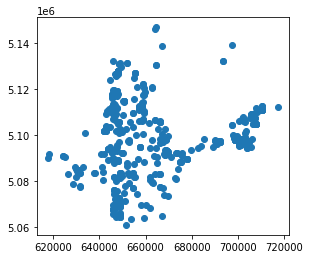

In [144]:
caves.plot()

we can search by bounding box

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/bbox_klokantech.png)

https://boundingbox.klokantech.com/

In [145]:
csw = CatalogueServiceWeb("http://www.pcn.minambiente.it/geoportal/csw")

In [146]:
bbox_query = BBox([10.770062,45.866839,11.022748,46.083374])

In [147]:
csw.getrecords2(constraints=[bbox_query],maxrecords=100)

In [148]:
csw.results

{'matches': 117, 'nextrecord': 101, 'returned': 100}

In [149]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

m_amte:299FN3:f451a878-27b3-43be-bc19-6eeb1362392a - DSM FIRST LiDAR con risoluzione a terra 1 metro - Regione Veneto
m_amte:299FN3:554245de-46c5-4ff9-a214-43eb794baad8 - DSM LAST LiDAR con risoluzione a terra 1 metro - Regione Veneto
m_amte:299FN3:6ad216c2-614b-4eb6-94d8-deefee09ba48 - DTM LiDAR con risoluzione a terra 1 metro - Regione Veneto
m_amte:299FN3:046e201a-1864-4fb0-cd36-1cf75fbac550 - INTENSITY LiDAR con risoluzione a terra 1 metro - Regione Veneto
m_amte:299FN3:84a24090-2239-4e54-8764-8fa0a2e239a5 - DSM FIRST LiDAR con risoluzione a terra 1 metro - Regione Lombardia
m_amte:299FN3:0a0b4709-a1c2-47c1-8749-5816e25d9c4f - DSM LAST LiDAR con risoluzione a terra 1 metro - Regione Lombardia
m_amte:299FN3:e02c7579-8031-4563-fca5-e2f1523fa7d4 - DTM LiDAR con risoluzione a terra 1 metro - Regione Lombardia
m_amte:299FN3:4b87ddce-2c7d-4c27-e100-caf0557c477c - INTENSITY LiDAR con risoluzione a terra 1 metro - Regione Lombardia
m_amte:299FN3:cbd1bd6d-4f0a-4707-aa42-fa97cf5a9a6e - Prodo

In [150]:
s="m_amte:299FN3:d0439890-8379-45ac-f70b-3d7f11f20ce9" #water

In [151]:
record = csw.records[s]

In [152]:
record.title

'Bacini idrografici principali'

In [153]:
record.abstract

'Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini idrografici dei corsi d’acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq.'

In [154]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/WMS_v1.3/Vettoriali/Bacini_idrografici.map
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://www.pcn.minambiente.it/viewer/index.php?services=bacini_idrografici
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&Service=WFS
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Thumbnail
http://www.pcn.minambiente.it/anteprima/bacini_idrografici.gif
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
http://www.pcn.minambiente.it/geoportal/csw?getxml=%7BB10A04E2-2B67-434B-AD0E-30ED272F63E9%7D
OGC:WMS
http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/WMS_v1.3/Vettoriali/Bacini_idrografici.map
OGC:WFS
http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&Service=WFS


## WFS

In [155]:
from owslib.wfs import WebFeatureService

In [156]:
url="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&Service=WFS"

In [157]:
wfs = WebFeatureService(url=url,version="1.1.0") #version can be: 1.0.0, 1.1.0, 2.0.0

In [158]:
wfs.identification.title

"Specchi d'acqua interni"

In [159]:
[operation.name for operation in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [160]:
list(wfs.contents)

['ID.ACQUEFISICHE.SPECCHI.ACQUA']

In [161]:
capabilities = wfs.getcapabilities().read()

```xml
<WFS_Capabilities xmlns="http://www.opengis.net/wfs" xmlns:ogc="http://www.opengis.net/ogc" xmlns:ows="http://www.opengis.net/ows" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.1.0" xmlns:inspire_common="http://inspire.ec.europa.eu/schemas/common/1.0" xmlns:inspire_dls="http://inspire.ec.europa.eu/schemas/inspire_dls/1.0" xsi:schemaLocation="http://www.opengis.net/wfs http://schemas.opengis.net/wfs/1.1.0/wfs.xsd http://inspire.ec.europa.eu/schemas/inspire_dls/1.0 http://inspire.ec.europa.eu/schemas/inspire_dls/1.0/inspire_dls.xsd">
  <ows:ServiceIdentification>
    <ows:Title>Specchi d\'acqua interni</ows:Title>
    <ows:Abstract>Elementi poligonali appartenenti al DBPrior10K  rappresentanti gli specchi d\'acqua interni come laghi, lagune, stagni, bacini artificiali, ecc.</ows:Abstract>
    <ows:ServiceType codeSpace="OGC">OGC WFS</ows:ServiceType>
    <ows:ServiceTypeVersion>1.1.0</ows:ServiceTypeVersion>
    <ows:Fees>Nessuna condizione applicata</ows:Fees>
    <ows:AccessConstraints>Nessuno</ows:AccessConstraints>
  </ows:ServiceIdentification>
  <ows:ServiceProvider>
    <ows:ProviderName>Geoportale Nazionale - Ministero dell\'Ambiente e della Tutela del Territorio e del Mare</ows:ProviderName>
    <ows:ProviderSite xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map" xlink:type="simple" />
    <ows:ServiceContact>
      <ows:IndividualName>Geoportale Nazionale - Ministero dell\'Ambiente e della Tutela del Territorio e del Mare</ows:IndividualName>
      <ows:PositionName>Distributore</ows:PositionName>
      <ows:ContactInfo>
        <ows:Phone>
          <ows:Voice>+390657223140</ows:Voice>
          <ows:Facsimile />
        </ows:Phone>
        <ows:Address>
          <ows:DeliveryPoint>Via Cristoforo Colombo, 44</ows:DeliveryPoint>
          <ows:City>Roma</ows:City>
          <ows:AdministrativeArea>RM</ows:AdministrativeArea>
          <ows:PostalCode>00147</ows:PostalCode>
          <ows:Country>Italia</ows:Country>
          <ows:ElectronicMailAddress>pcn@minambiente.it</ows:ElectronicMailAddress>
        </ows:Address>
        <ows:OnlineResource xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map" xlink:type="simple" />
        <ows:HoursOfService />
        <ows:ContactInstructions />
      </ows:ContactInfo>
      <ows:Role />
    </ows:ServiceContact>
  </ows:ServiceProvider>
  <ows:OperationsMetadata>
    <ows:Operation name="GetCapabilities">
      <ows:DCP>
        <ows:HTTP>
          <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&amp;" xlink:type="simple" />
          <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&amp;" xlink:type="simple" />
        </ows:HTTP>
      </ows:DCP>
      <ows:Parameter name="service">
        <ows:Value>WFS</ows:Value>
      </ows:Parameter>
      <ows:Parameter name="AcceptVersions">
        <ows:Value>1.0.0</ows:Value>
        <ows:Value>1.1.0</ows:Value>
      </ows:Parameter>
      <ows:Parameter name="AcceptFormats">
        <ows:Value>text/xml</ows:Value>
      </ows:Parameter>
    </ows:Operation>
    <ows:Operation name="DescribeFeatureType">
      <ows:DCP>
        <ows:HTTP>
          <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&amp;" xlink:type="simple" />
          <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&amp;" xlink:type="simple" />
        </ows:HTTP>
      </ows:DCP>
      <ows:Parameter name="outputFormat">
        <ows:Value>XMLSCHEMA</ows:Value>
        <ows:Value>text/xml; subtype=gml/2.1.2</ows:Value>
        <ows:Value>text/xml; subtype=gml/3.1.1</ows:Value>
      </ows:Parameter>
    </ows:Operation>
    <ows:Operation name="GetFeature">
      <ows:DCP>
        <ows:HTTP>
          <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&amp;" xlink:type="simple" />
          <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Specchi_Acqua.map&amp;" xlink:type="simple" />
        </ows:HTTP>
      </ows:DCP>
      <ows:Parameter name="resultType">
        <ows:Value>results</ows:Value>
        <ows:Value>hits</ows:Value>
      </ows:Parameter>
      <ows:Parameter name="outputFormat">
        <ows:Value>text/xml; subtype=gml/3.1.1</ows:Value>
      </ows:Parameter>
    </ows:Operation>
<ows:ExtendedCapabilities><inspire_dls:ExtendedCapabilities><inspire_common:ResourceLocator xsi:type="inspire_common:resourceLocatorType"><inspire_common:URL>http://wms.pcn.minambiente.it/cgi-bin/mapserv.exe?map=/ms_ogc/wfs/Bacini_idrografici.map</inspire_common:URL><inspire_common:MediaType>application/vnd.ogc.wfs_xml</inspire_common:MediaType></inspire_common:ResourceLocator><inspire_common:ResourceType>service</inspire_common:ResourceType><inspire_common:TemporalReference><inspire_common:DateOfCreation>2011-09-20</inspire_common:DateOfCreation></inspire_common:TemporalReference><inspire_common:TemporalReference><inspire_common:DateOfPublication>2011-09-20</inspire_common:DateOfPublication></inspire_common:TemporalReference><inspire_common:TemporalReference><inspire_common:DateOfLastRevision>2013-01-23</inspire_common:DateOfLastRevision></inspire_common:TemporalReference><inspire_common:Conformity><inspire_common:Specification><inspire_common:Title>REGOLAMENTO (UE) N. 1089/2010 DELLA COMMISSIONE del 23 novembre 2010 recante attuazione della direttiva 2007/2/CE del Parlamento europeo e del Consiglio per quanto riguarda l\'interoperabilit&#224; dei set di dati territoriali e dei servizi di dati territoriali</inspire_common:Title><inspire_common:DateOfPublication>2010-12-08</inspire_common:DateOfPublication><inspire_common:URI>OJ:L:2010:323:0011:0102:IT:PDF</inspire_common:URI><inspire_common:ResourceLocator><inspire_common:URL>http://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2010:323:0011:0102:IT:PDF</inspire_common:URL><inspire_common:MediaType>application/pdf</inspire_common:MediaType></inspire_common:ResourceLocator></inspire_common:Specification><inspire_common:Degree>notConformant</inspire_common:Degree></inspire_common:Conformity><inspire_common:MetadataPointOfContact><inspire_common:OrganisationName>Ministero dell\'Ambiente e della Tutela del Territorio e del Mare - Geoportale Nazionale</inspire_common:OrganisationName><inspire_common:EmailAddress>pcn@minambiente.it</inspire_common:EmailAddress></inspire_common:MetadataPointOfContact><inspire_common:MetadataDate>2011-04-28</inspire_common:MetadataDate><inspire_common:SpatialDataServiceType>Download</inspire_common:SpatialDataServiceType><inspire_common:MandatoryKeyword><inspire_common:KeywordValue>infoFeatureAccessService</inspire_common:KeywordValue></inspire_common:MandatoryKeyword><inspire_common:Keyword xsi:type="inspire_common:inspireTheme_ita"><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - INSPIRE themes</inspire_common:Title><inspire_common:DateOfPublication>2008-06-01</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Idrografia</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:KeywordValue>Acque interne</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - Themes, version 2.4</inspire_common:Title><inspire_common:DateOfPublication>2010-01-13</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Acqua</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - Concepts, version 2.4</inspire_common:Title><inspire_common:DateOfPublication>2010-01-13</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Lago</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - Concepts, version 2.4</inspire_common:Title><inspire_common:DateOfPublication>2010-01-13</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Lago artificiale</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - Concepts, version 2.4</inspire_common:Title><inspire_common:DateOfPublication>2010-01-13</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Laguna</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:SupportedLanguages><inspire_common:DefaultLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:DefaultLanguage><inspire_common:SupportedLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:SupportedLanguage></inspire_common:SupportedLanguages><inspire_common:ResponseLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:ResponseLanguage></inspire_dls:ExtendedCapabilities></ows:ExtendedCapabilities></ows:OperationsMetadata>
  <FeatureTypeList>
    <Operations>
      <Operation>Query</Operation>
    </Operations>
    <FeatureType>
      <Name>ID.ACQUEFISICHE.SPECCHI.ACQUA</Name>
      <Title>Specchi d\'acqua interni</Title>
      <Abstract>La tabella associata contiene le seguenti informazioni: NOME,  informazione, non sempre presente, relativa al nome allo specchio d\'acqua; ORIGINE, origine del dato spaziale; NATURA SPECCHIO D\'ACQUA, individua la natura dello specchio d\'acqua (lago, laguna, bacino artificiale, ecc.); AREA_mq, area, espressa in mq, dello specchio d\'acqua; PERIMETRO_m, perimetro, espresso in metri, dello specchio d\'acqua.</Abstract>
      <ows:Keywords>
        <ows:Keyword>Idrografia</ows:Keyword>
        <ows:Keyword> Acqua</ows:Keyword>
        <ows:Keyword> Lago</ows:Keyword>
        <ows:Keyword> Lago artificiale</ows:Keyword>
        <ows:Keyword> Laguna</ows:Keyword>
      </ows:Keywords>
      <DefaultSRS>urn:ogc:def:crs:EPSG::4326</DefaultSRS>
      <OutputFormats>
        <Format>text/xml; subtype=gml/3.1.1</Format>
      </OutputFormats>
      <ows:WGS84BoundingBox dimensions="2">
        <ows:LowerCorner>6 34.5</ows:LowerCorner>
        <ows:UpperCorner>19 49</ows:UpperCorner>
      </ows:WGS84BoundingBox>
      <MetadataURL format="ISO19115:2003" type="text/xml">http://www.pcn.minambiente.it/geoportal/csw?SERVICE=CSW&amp;VERSION=2.0.2&amp;REQUEST=GetRecordById&amp;outputSchema=http%3A%2F%2Fwww.isotc211.org%2F2005%2Fgmd&amp;elementSetName=full&amp;ID=m_amte:8HCH2C:5e1ddddd-9414-4a3f-9460-ccb88eef00c2</MetadataURL>
    </FeatureType>
  </FeatureTypeList>
  <ogc:Filter_Capabilities>
    <ogc:Spatial_Capabilities>
      <ogc:GeometryOperands>
        <ogc:GeometryOperand>gml:Point</ogc:GeometryOperand>
        <ogc:GeometryOperand>gml:LineString</ogc:GeometryOperand>
        <ogc:GeometryOperand>gml:Polygon</ogc:GeometryOperand>
        <ogc:GeometryOperand>gml:Envelope</ogc:GeometryOperand>
      </ogc:GeometryOperands>
      <ogc:SpatialOperators>
        <ogc:SpatialOperator name="Equals" />
        <ogc:SpatialOperator name="Disjoint" />
        <ogc:SpatialOperator name="Touches" />
        <ogc:SpatialOperator name="Within" />
        <ogc:SpatialOperator name="Overlaps" />
        <ogc:SpatialOperator name="Crosses" />
        <ogc:SpatialOperator name="Intersects" />
        <ogc:SpatialOperator name="Contains" />
        <ogc:SpatialOperator name="DWithin" />
        <ogc:SpatialOperator name="Beyond" />
        <ogc:SpatialOperator name="BBOX" />
      </ogc:SpatialOperators>
    </ogc:Spatial_Capabilities>
    <ogc:Scalar_Capabilities>
      <ogc:LogicalOperators />
      <ogc:ComparisonOperators>
        <ogc:ComparisonOperator>LessThan</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>GreaterThan</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>LessThanEqualTo</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>GreaterThanEqualTo</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>EqualTo</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>NotEqualTo</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>Like</ogc:ComparisonOperator>
        <ogc:ComparisonOperator>Between</ogc:ComparisonOperator>
      </ogc:ComparisonOperators>
    </ogc:Scalar_Capabilities>
    <ogc:Id_Capabilities>
      <ogc:EID />
      <ogc:FID />
    </ogc:Id_Capabilities>
  </ogc:Filter_Capabilities>
</WFS_Capabilities>
```

In [162]:
for layer, meta in wfs.items():
    print(meta.__dict__)
    print(meta.title)
    print(meta.abstract)
    print(meta.crsOptions)
    print(meta.outputFormats)
    

{'auth': <Authentication shared=False username=None password=None cert=None verify=True>, 'headers': None, 'id': 'ID.ACQUEFISICHE.SPECCHI.ACQUA', 'title': "Specchi d'acqua interni", 'abstract': "La tabella associata contiene le seguenti informazioni: NOME,  informazione, non sempre presente, relativa al nome allo specchio d'acqua; ORIGINE, origine del dato spaziale; NATURA SPECCHIO D'ACQUA, individua la natura dello specchio d'acqua (lago, laguna, bacino artificiale, ecc.); AREA_mq, area, espressa in mq, dello specchio d'acqua; PERIMETRO_m, perimetro, espresso in metri, dello specchio d'acqua.", 'keywords': ['Idrografia', ' Acqua', ' Lago', ' Lago artificiale', ' Laguna'], 'boundingBoxWGS84': (6.0, 34.5, 19.0, 49.0), 'crsOptions': [urn:ogc:def:crs:EPSG::4326], 'verbOptions': [], 'outputFormats': ['text/xml; subtype=gml/3.1.1'], 'metadataUrls': [{'type': 'text/xml', 'format': 'ISO19115:2003', 'url': 'http://www.pcn.minambiente.it/geoportal/csw?SERVICE=CSW&VERSION=2.0.2&REQUEST=GetRecord

In [163]:
layer = list(wfs.contents)[0]

In [164]:
layer

'ID.ACQUEFISICHE.SPECCHI.ACQUA'

In [165]:
response = wfs.getfeature(typename=layer, bbox=(10.7976,45.8649,10.9851,46.0496),srsname='urn:ogc:def:crs:EPSG::4326')
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [166]:
out = open('lakes_inbbox.gml', 'wb')
out.write(response.read())
out.close()

In [167]:
lakes_inbbox = gpd.read_file("lakes_inbbox.gml")

In [168]:
lakes_inbbox.head(5)

,gml_id,nome,origine,descrizione_origine,nasp,natura_specchio_acqua,geometry
0,ID.ACQUEFISICHE.SPECCHI.ACQUA.54186,LAGO DI LOPPIO,0,Non codificato,0,Non codificato,"MULTIPOLYGON (((45.85832 10.92376, 45.85823 10..."
1,ID.ACQUEFISICHE.SPECCHI.ACQUA.54162,LAGO DEI BAGATOI (DRO),0,Non codificato,0,Non codificato,"MULTIPOLYGON (((45.98244 10.92241, 45.98238 10..."
2,ID.ACQUEFISICHE.SPECCHI.ACQUA.54164,LAGO SOLO,0,Non codificato,0,Non codificato,"MULTIPOLYGON (((45.97719 10.93186, 45.97714 10..."
3,ID.ACQUEFISICHE.SPECCHI.ACQUA.54159,LAGO TORBIERA DI FIAVE' 2?,0,Non codificato,0,Non codificato,"MULTIPOLYGON (((45.99459 10.83050, 45.99450 10..."
4,ID.ACQUEFISICHE.SPECCHI.ACQUA.54160,LAGO TORBIERA DI FIAVE' 3?,0,Non codificato,0,Non codificato,"MULTIPOLYGON (((45.99366 10.83341, 45.99362 10..."


In [169]:
lakes_inbbox.unary_union.centroid.x

45.873490909948416

In [170]:
map_lakes = folium.Map([lakes_inbbox.unary_union.centroid.y,lakes_inbbox.unary_union.centroid.x], zoom_start=12)
folium.GeoJson(lakes_inbbox.to_json()).add_to(map_lakes)
map_lakes

There is a problem with the orientation of the axes<br/>
This is a false problem because the official order of coordinates in EPSG:4326 is latitude and longitude.<br/>
Usually Geopandas corrects it alone.<br/>
In this case we need an operation to change the axes orientation<br/>
This function is supplied in the shapely package.<br/>

In [171]:
import shapely

example with a geometry

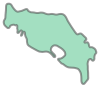

In [172]:
lakes_inbbox.geometry[0]

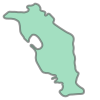

In [173]:
shapely.ops.transform(lambda x, y: (y, x),lakes_inbbox.geometry[0])

creation of a function to be use in the *apply* method of pandas

In [174]:
def swapxy(geometry):
  geometry = shapely.ops.transform(lambda x, y: (y, x),geometry)
  return geometry

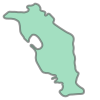

In [175]:
swapxy(lakes_inbbox.geometry[0])

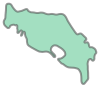

In [176]:
lakes_inbbox.geometry[0]

In [177]:
map_lakes = folium.Map([lakes_inbbox.unary_union.centroid.y,lakes_inbbox.unary_union.centroid.x], zoom_start=10)
folium.GeoJson(lakes_inbbox.to_json()).add_to(map_lakes)
map_lakes

## Summary WFS
- there are different versions
- from the version 1.1.0 you can have the problem of the axis inverted
- check always the boundary: more is big and more you have to wait.. more you have to wait and more the connection can go in timeout
- if the dataset is available as geojson you can load directly in geopandas
- otherwise you need to download in another format (eg. gml), save it and load as normal file


# ESRI ArcGIS Online RESTAPI

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/dashboard_covid_protezionecivile.png)

http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/esri_dpc.png)

https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services

Documentation of the ESRI API's<br/>https://developers.arcgis.com/rest/

In [178]:
pip install pyshp

In [179]:
pip install bmi-arcgis-restapi

In [180]:
import os
# we need this to inform the bmi-arcgis-restapi to use pyshp and not arcpy
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'
import restapi

[bmi-arcgis-restapi](https://github.com/Bolton-and-Menk-GIS/restapi) can use [arcpy](https://desktop.arcgis.com/en/arcmap/10.3/analyze/arcpy/what-is-arcpy-.htm) (proprietary software) o *pyshp* (opensource).

**pyshp** *faster* but with the *basic* functions

In [181]:
rest_url = 'https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services'

# no authentication is required, so no username and password are supplied
ags = restapi.ArcServer(rest_url)

In [182]:
ags.services

[{
  "name": "campi_scuola_2018",
  "type": "FeatureServer",
  "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/campi_scuola_2018/FeatureServer"
},
 {
  "name": "CampiScuola_2019",
  "type": "FeatureServer",
  "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/CampiScuola_2019/FeatureServer"
},
 {
  "name": "campiscuola2018_def",
  "type": "FeatureServer",
  "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/campiscuola2018_def/FeatureServer"
},
 {
  "name": "CapoluoghiProvincia",
  "type": "FeatureServer",
  "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/CapoluoghiProvincia/FeatureServer"
},
 {
  "name": "Comuni_Terremotati",
  "type": "FeatureServer",
  "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/Comuni_Terremotati/FeatureServer"
},
 {
  "name": "Comuni_terremoto",
  "type": "FeatureServer",
  "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS

In [184]:
# access "CapoluoghiProvincia" service 
ags_service = ags.getService('CapoluoghiProvincia')
ags_service.list_layers()

['CapoluoghiProvincia']

In [185]:
provincial_capitals = ags_service.layer('CapoluoghiProvincia') #not case sensitive, also supports wildcard search (*)

In [186]:
provincial_capitals.list_fields()

['FID',
 'OBJECTID',
 'COD_ISTAT',
 'COD_REG',
 'COD_PRO',
 'PRO_COM',
 'LOC2011',
 'LOC',
 'TIPO_LOC',
 'DENOMINAZI',
 'ALTITUDINE',
 'CENTRO_CL',
 'POPRES',
 'MASCHI',
 'FAMIGLIE',
 'ABITAZIONI',
 'EDIFICI',
 'Shape_Leng',
 'Shape_Area',
 'FID_1',
 'COD_RIP',
 'COD_REG_1',
 'COD_PROV',
 'COD_CM',
 'COD_PCM',
 'DEN_PROV',
 'DEN_CM',
 'DEN_PCM',
 'SIGLA',
 'Shape_Le_1',
 'Shape_Ar_1',
 'ORIG_FID']

In [187]:
# export layer to shapefile in WGS 1984 projection
provincial_capitals.export_layer('provincial_capitals.shp', outSR=4326)

Created: "provincial_capitals.shp"


'provincial_capitals.shp'

In [189]:
gpd_provincial_capitals = gpd.read_file('provincial_capitals.shp')

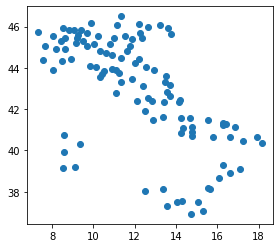

In [190]:
gpd_provincial_capitals.plot()

---
# Exercises
- find the administrative border of "comunità di valle" (community of valley) of Province Autonomous of Trento
- identify all the rivers inside the smallest community of valley of Trentino
- repeat the same exercise with the layer "Comuni Terremotati" (municipalities affected by earthquake) of the italian Civil Protection by choosing the smallest municipality contained on the layer